# Cogsci 131 Project 1
### Senula Wijeratne
### Fall 2023

#### First Lets Construct our basic network functions:

In [11]:
import numpy as np
import copy
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        # Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    # This method is for question 1.4; randomizes the weights of the network
    def randomizeWeights(self):
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self,X):
        # Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        # Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        # Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        # Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        # Compute derivatives with respect to W1 and W2 assuming sigmoid is the activation function
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    # Minimizes the costFunction to a desired accuracy using a given scalar
    def minimizeCostFunction(self, inputs, outputs, scalar, accuracy):
        costs = []
        curr_acc = 1-self.costFunction(inputs,outputs)
        
        # While the current accuracy is less that the desired accuracy
        while curr_acc < accuracy:
            # Shift the Ws and update the current accuracy, record cost after shift
            cost = self.shiftW(inputs,outputs, scalar)
            curr_acc = 1-self.costFunction(inputs,outputs)
            costs.append(cost)
            
        # Return list containing the costs from each iteration a W shift occured
        return costs
        
    # Shifts the weights of the network by a given scalar
    def shiftW(self, inputs, outputs, scalar):
        # Calculate derivatives
        dJdW1, dJdW2 = self.costFunctionPrime(inputs,outputs)
        
        # Apply math
        self.W1 = self.W1 - scalar * dJdW1
        self.W2 = self.W2 - scalar * dJdW2
        
        # Return cost after shift has taken place
        cost = self.costFunction(inputs,outputs)
        return cost
    
    # The following functions were defined for Question 1.4 for the purpose to expiditing plotting, may be unused
    
    # initializes a weight history for the network
    def trackW(self):
        self.wHist = {'W1': [], 'W2': []}

    # Records the current weights of the array
    def record_weights(self):
        self.wHist['W1'].append(copy.deepcopy(self.W1))
        self.wHist['W2'].append(copy.deepcopy(self.W2))

### Question 1.2
#### How can we write a program that minimizes the cost function to a given accuracy given by us?

First lets define the desired inputs and outputs (given in skeleton code):

In [12]:
inputs = np.array(([3,5],[5,1],[10,1]),dtype=float)
inputs

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [13]:
y = np.array(([75],[80],[93]),dtype=float)
y

array([[75.],
       [80.],
       [93.]])

We must now scale our inputs and outputs in order to ensure the network can accurately compare inputs and outputs:

In [14]:
inputs = inputs/np.amax(inputs,axis=0)
y = y/100
inputs

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.2]])

In [15]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

In [16]:
# First innitialize a new neural work
n1 = Neural_Network()

Given the examples and the skeleton code, we know that W1(new) = W1(old) - Scalar * dJ/dW1(old), and that W2(new) = W2(old) - scalar * dJ/dW2(old). Returning to the question, we are trying to minimize the cost function to a given accuracy. We can do this by creating two new functions in the Nueral_Network class that uses the formulas to shift the weigths in order to achive a desired accuracy for the network. The code for the two functions can be seen below as well as in the Nueral Network class.

Now we can use the shiftW and minimizeCostFunction to train the network to achieve the task at hand. The example given in the equation gave a sample accuracy of .1% away from the target (99.9% accuracy). Let us use the neural network to train our network n1 to this accuracy and check our results.

In [17]:
# Calls the minimizeCostFunction to shift the Ws to the given accuracy (expressed in decimal form)
costsSig = n1.minimizeCostFunction(inputs, y, 3, .999)
# Calculates and prints our new output
output = n1.forward(inputs)
print(output)
print(y)

[[0.74710875]
 [0.82946264]
 [0.89649022]]
[[0.75]
 [0.8 ]
 [0.93]]


As a final step, let us compare our new outputs to our given outputs to truly verify its accuracy.

In [18]:
acc = n1.costFunction(inputs,y)
print(acc)
print(len(costsSig))

[0.00099966]
19285


As we can see, the network has successfully shifted its weights to minimize the cost function so that it is within the given accuracy threshold of the actual ouput. Here is a visual representation of the cost vs iteration.

Text(0, 0.5, 'cost')

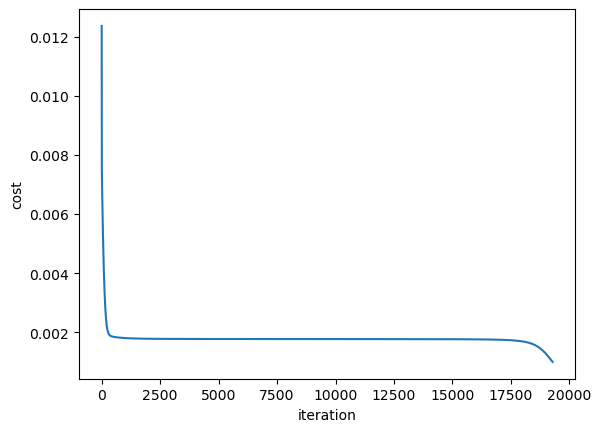

In [19]:
iters = np.arange(0,len(costsSig))
plt.plot(iters, costsSig)
plt.xlabel("iteration")
plt.ylabel("cost")

It is important to note that in the example above we used an arbitrary scalar 3. Since scalars are also known as learning rates, let us examine what happens when the scalar is unusually large. Before we can test each scalar, let's create 3 equivalent neural networks so that we can accurately test how the change in the output of the loss function is affected by multiple scalars. 

In [20]:
net1 = Neural_Network()
net2 = copy.deepcopy(net1) # creates a second network identical to the first
net3 = copy.deepcopy(net1)
costsSmall = []
costsNormal = []
costsLarge = []
f1 = net1.forward(inputs)
f2 = net2.forward(inputs)
f3 = net3.forward(inputs)
print(f1)
print(f2)
print(f3)

[[0.56419581]
 [0.55650171]
 [0.56233229]]
[[0.56419581]
 [0.55650171]
 [0.56233229]]
[[0.56419581]
 [0.55650171]
 [0.56233229]]


Now that we've confirmed all three networks all the same, lets compare how each scalar affects the cost over subsequent iterations:

In [21]:
for i in range(0,10,1):
    costS = net3.shiftW(inputs,y,.3)
    costN = net1.shiftW(inputs,y,3)
    costL = net2.shiftW(inputs,y,1000)
    costsSmall.append(costS[0])
    costsNormal.append(costN[0])
    costsLarge.append(costL[0])
print(costsSmall)

[0.10106226675537947, 0.08955232729503892, 0.07968838207148524, 0.07122372933782112, 0.06394470235871746, 0.05766886677893279, 0.052241907355681114, 0.04753405221439104, 0.04343652283622599, 0.03985826124015008]


In [22]:
print(costsNormal)

[0.024907463952393582, 0.01408212706448429, 0.010918856995197243, 0.009663027401305936, 0.009075363374822924, 0.008765762994477901, 0.008584415905117573, 0.008466335713209268, 0.008380961782236605, 0.008313095942406602]


In [23]:
print(costsLarge)

[0.053699999999999984, 0.053699999999999984, 0.053699999999999984, 0.053699999999999984, 0.053699999999999984, 0.053699999999999984, 0.053699999999999984, 0.053699999999999984, 0.053699999999999984, 0.053699999999999984]


As you can see, when an abnormally large scalar was used to train the network, the output of the cost function failed to change. The data above suggests that abnormally large scalar values past a certain threshold can fail to converge to a minimum value, in turn causing the loss function to never decrease over iterations. It must also be noted that such an occurrence also implies that abnormally large scalar values cause the network to oscillate between points along the parameter space as well.

### Question 1.3
#### Part A: How can we create a neural network that uses ReLu as its activation function instead of sigmoid?

First lets redefine the neural network class to use the ReLu activation function instead of the sigmoid activation function. There is one thing that must be kept in mind when implementing the ReLu version of our single hidden layer neural network, specifically when implementing the costFunctionPrime and minimizeCostFunctionR functions. That being, the derivative of the ReLu function is discontinuous, meaning that the original Sigmoid implementations will no longer be sufficient. 

In [24]:
class Neural_Network_Relu(object):
    def __init__(self):
        # Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        # Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def forward(self, X):
        # Propagate inputs through network using ReLu
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.relu(self.z3)
        return yHat
    
    def costFunction(self, X, y):
        # Compute Cost Function with weights already stored in class
        self.yHat = self.forward(X)
        J = 0.5 * np.sum((y - self.yHat) ** 2)
        return J
    
    def costFunctionPrime(self, X, y):
        # Compute derivatives with respect to W1 and W2 using ReLu prime
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y - self.yHat), self.reluPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        delta2 = np.dot(delta3, self.W2.T) * self.reluPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1, dJdW2
    
    # Apply the idea of convergence paths to propose an theshold where values converge to the minima of the loss function
    def minimizeCostFunctionR(self, inputs, outputs, scalar, accuracy):
        costs = []
        sACC = 0.0 # Ensures the starting accuracy is 0 and a double
        num = 1e-6  # A small number we can use as our theshold to test convergence
        while True:
            cost = self.shiftWR(inputs, outputs, scalar)
            curr = 1 - self.costFunction(inputs, outputs)
            costs.append(cost)
            # Check for convergence based on a tolerance
            if abs(curr - sACC) < num: # Coverges when absolute difference between the current accuracy and previous accuracy < num
                break
            sACC = curr
        return costs
        
    def shiftWR(self, inputs, outputs, scalar):
        dJdW1, dJdW2 = self.costFunctionPrime(inputs,outputs)
        self.W1 = self.W1 - scalar * dJdW1
        self.W2 = self.W2 - scalar * dJdW2
        cost = self.costFunction(inputs,outputs)
        return cost

Lets use our new nueral network to compare its effenciecy to the original sigmoid implementation.

In [25]:
nn = Neural_Network_Relu()
costsR = nn.minimizeCostFunctionR(inputs,y,.3,.999)
acc = nn.costFunctionPrime(inputs,y)
diff = round((len(costsSig) - len(costsR)) / len(costsSig) * 100,3)
print(acc[0])
print(len(costsR))
print(f"The new network took about {diff}% less iterations than the sigmoid network to minimize.")

[[ 0.00070846  0.00011941  0.00012802]
 [-0.00111501 -0.00018794 -0.00020149]]
17
The new network took about 99.912% less iterations than the sigmoid network to minimize.


Text(0, 0.5, 'cost')

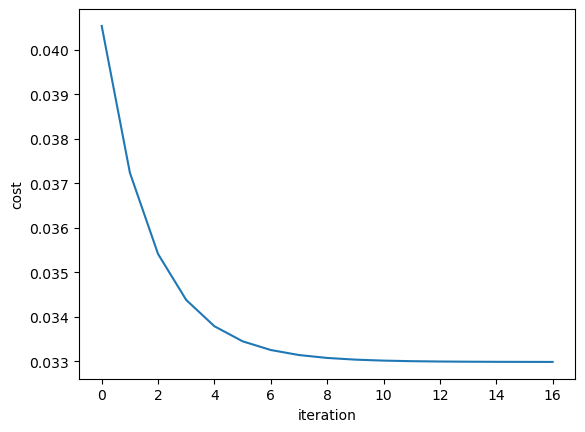

In [26]:
itersR = np.arange(0,len(costsR))
plt.plot(itersR,costsR)
plt.xlabel("iteration")
plt.ylabel("cost")

Looking at the results it is clear that ReLu is a far superior activation function for the task of minimizing our cost function to a given accuracy. It is important to note that the shape of the cost vs. iteration curve for the ReLu function is far steeper decline than that of its Sigmoid counterpart. Although I will not be implementing part B with the ReLu function, I must admit it would be interesting to examine the effect of adding additional hidden layers to the ReLu implementation of the base network.

#### Part B: How can we construct a nueral network with an additional hidden layer? How does it compare to our original implenetation?

Before we implement a new Neural_Network class, let us first model the structure we want our new nueral network to achieve.

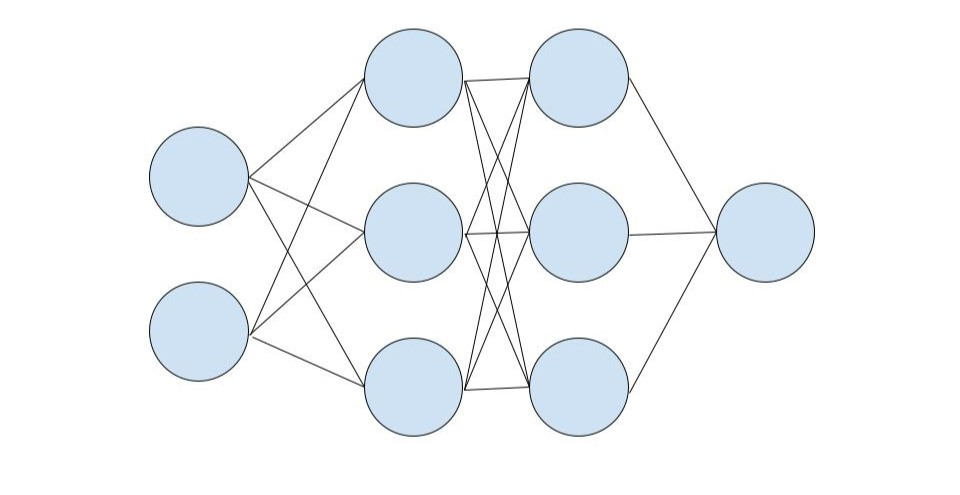

As you can see, I opted for a hidden layer with a size of 3. This is an arbitrary number I chose because it is the same as the size of the first hidden layer. Now that we have decided on the general structure for our new network, let us implement a new version of the Neural_Network class:

In [27]:
class Neural_Network_Hidden(object):
    def __init__(self):
        # Define an additional hiddenLayerSize attribute and number them
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayer1Size=3
        self.hiddenLayer2Size=3
        
        # Add a third wieght layer and adjust rand() parameters
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size,self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size,self.outputLayerSize)

    def forward(self,X):
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.sigmoid(self.z3) # apply extra steps to satisfy math with additional layer
        self.z4 = np.dot(self.a3,self.W3) 
        yHat = self.sigmoid(self.z4) 
        return yHat
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        self.yHat=self.forward(X)
        delta4 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.z4)) # Back propogate with the new hidden layer in mind
        dJdW3 = np.dot(self.a3.T, delta4) # Calculate diference in J with respect to W3
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2,dJdW3
    
    def minimizeCostFunction(self, inputs, outputs, scalar, accuracy):
        costs = []
        curr_acc = 1-self.costFunction(inputs,outputs)
        
        while curr_acc < accuracy:
            cost = self.shiftW(inputs,outputs, scalar)
            curr_acc = 1-self.costFunction(inputs,outputs)
            costs.append(cost)
        return costs
        
    def shiftW(self, inputs, outputs, scalar):
        dJdW1, dJdW2, dJdW3 = self.costFunctionPrime(inputs,outputs)
        self.W1 = self.W1 - scalar * dJdW1
        self.W2 = self.W2 - scalar * dJdW2
        self.W3 = self.W3 - scalar * dJdW3
        cost = self.costFunction(inputs,outputs)
        return cost

Now that we've implemented our new neural network, let's see how it compares to our original network:
(Note: this implementation is comparing itself to the original neural network implementation from 1.2, and thus uses the sigmoid activation function and the same arbitrary scalar 3)

In [28]:
hidden = Neural_Network_Hidden()
costsHidden = hidden.minimizeCostFunction(inputs,y,3,.999)
outHidden = hidden.costFunction(inputs,y)
dif = (len(costsSig) - len(costsHidden))/len(costsSig)*100
difff = (len(costsHidden) - len(costsR))/len(costsHidden)*100
print(outHidden)
print(len(costsHidden))
print(f"The new network took {dif}% less iterations than the single hidden layer Sigmoid network to minimize.")
print(f"The new network took {difff}% more iterations than the single hidden layer ReLu network to minimize.")

[0.00099879]
1958
The new network took 89.84703137153228% less iterations than the single hidden layer Sigmoid network to minimize.
The new network took 99.1317671092952% more iterations than the single hidden layer ReLu network to minimize.


Text(0, 0.5, 'cost')

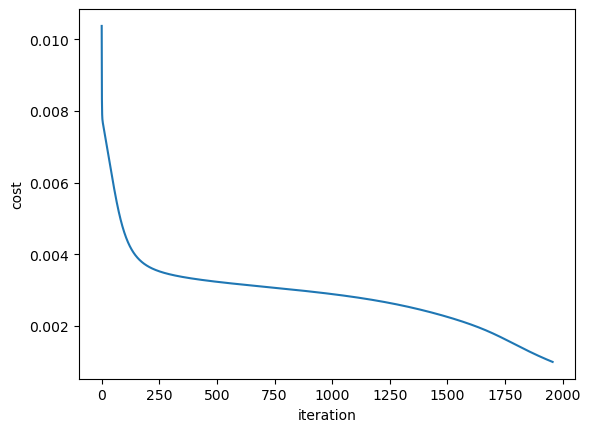

In [29]:
iters = np.arange(0,len(costsHidden))
plt.plot(iters, costsHidden)
plt.xlabel("iteration")
plt.ylabel("cost")

As we can see, the neural network with two layers was much more efficient to train, taking much fewer iterations than the variant with one hidden layer to successfully train the network. It is important to note that this demonstration does not take into account how changing the size/amount of hidden layers affects the network's training efficiency, which are all topics that should be revisited at a later time. Another important note is that on extremely rare occasions the double hidden layer network takes more iterations than the single hidden layer network. My hypothesis for said occurrence is that the network just so happened to initialize its weights close to a minima, thus taking less weight shifts to reach the desired accuracy threshold. Finally, it's easy to notice that the cost vs. iteration curve of the double hidden layer network was significantly different than both single hidden layer cost vs. iteration curves. Needless to say, the impact the number of hidden layers and individual hidden layer size have on the shape of the network's cost vs. iteration curve must also be investigated further. 

### Question 1.4
#### How do we go about investigating the geometry of the W space?

When we speak about the W space, we are referring to the space created by the W matrices. The geometrical properties of the W space can tell us a lot about the network, how it learns, and are thus extremely useful in the optimization process of our network. Let's think about how we can go about accomplishing the goal above. As we saw in "Essentially No Barriers Neural Networks" the minima and saddle points can be especially hard to pinpoint as the amount of parameters increases. I propose that we investigate the geometry of the W space by finding multiple minima/saddle points and using them to compute a loss vs time plot. Essentially, I am planning on adding on the work of Alan Zhou, Danny Halawi, and Emily Nguyen's summer 2021 project by adding increased functionality to create a loss vs time for all minima found in some iterations to analyze the effect additional unique minima have on the loss vs time curve.

Note: I will be using the inputs and outputs previously defined in 1.2 as the inputs and outputs for this task.

Here is a Psuedo-Code Overview of my proposed exploration algorithm:
1) Define a class to track the minima/saddle points explored, initialize min list and costCollector

2) Initialize two Neural_Network objects and train them to 99.9% accuracy

3) Check if maxima already exists in list, if not append it to a list of maxima

4) Initialize a time vector and parameterize and interpolate minimized networks

5) Append final cost to the costCollector and randomize weights to find new minima/saddle point

6) Repeat n times and then collect the per element average of each final cost in the costCollector list

7) Return averaged cost list and time vector for plotting

8) Plot and analyze results

In [34]:
class WSpaceExplorer(object):
    # Creates three neural_network objects, a minina tracker, and a costCollector
    def __init__(self):
        self.n1 = Neural_Network()
        self.n2 = Neural_Network()
        self.temp = Neural_Network()
        self.mins = []
        self.costCollector = []
    
    # Randomize the weights of n1 and n2
    def randomizeWeights(self):
        self.n1.randomizeWeights()
        self.n2.randomizeWeights()
    
    # Minimizes n1 and n2 until unique minima are found, appends minima to self.mins
    def minimize(self, inputs, y):
        # Find two minima/saddle points in W space
        min1 = self.n1.minimizeCostFunction(inputs, y, 3, 0.999)
        min2 = self.n2.minimizeCostFunction(inputs, y, 3, 0.999)

        # Ensure they are unique and update mins list
        if self.n1.W1.tolist() == self.n2.W1.tolist() and self.n1.W2.tolist() == self.n2.W2.tolist():
            # Continue to look for minima until unique value is found
            while self.n1.W1.tolist() == self.n2.W1.tolist() and self.n1.W2.tolist() == self.n2.W2.tolist():
                self.randomizeWeights()
                min1 = self.n1.minimizeCostFunction(inputs, y, 3, 0.999)
                min2 = self.n2.minimizeCostFunction(inputs, y, 3, 0.999)
            self.mins.append(len(min1))
            self.mins.append(len(min2))
        else:
            # Ensure minimin do not already exist in self.mins
            if (self.mins.count(len(min1)) == 0):
                self.mins.append(len(min1))
            if (self.mins.count(len(min2)) == 0):
                self.mins.append(len(min2))
    
    # Parameterizes n1 and n2 and interpolates
    def interpolate(self,inputs,y):
        # Shift weights until extrema is found
        self.minimize(inputs,y)
        
        # Parameterize weights
        t1 = [self.n1.W1,self.n1.W2]
        t2 = [self.n2.W1,self.n2.W2]
        
        # Initialize time vector
        time = np.arange(0,1.01,0.05)
        
        # Interpolate
        wHats = []
        for t in time:
            wHat1 = (1-t)*t1[0] + t*t2[0] # w_hat_1 = (1-time)*NN1.W1 + time*NN2.W1
            wHat2 = (1-t)*t1[1] + t*t2[1] # w_hat_2 = (1-time)*NN1.W2 + time*NN2.W2
            wHatParam = [wHat1, wHat2] # groups wHats at t
            wHats.append(wHatParam)
        
        # Initialize output list
        costs = []
        
        # Fill output lists with wHat costs
        for i in range(len(time)):
            self.temp.W1 = wHats[i][0]
            self.temp.W2 = wHats[i][1]
            cost = self.temp.costFunction(inputs,y)
            costs.append(cost)
            
        # Return result
        return costs
        
    # Explores the network to find numIter extrema for plotting final cost vs time
    def explore(self,inputs,y,numIter):
        # fill the costCollector list
        for i in range(numIter):
            # find cost and prep next for next iteration 
            cost = self.interpolate(inputs,y)
            self.costCollector.append(cost)
            self.randomizeWeights()
            
        # Initialize time vector for return
        time = np.arange(0,1.01,0.05)
        
        # Find the per element average of each elements loss value
        avg = np.mean(np.array(self.costCollector),axis=0)
        
        # Return final data for plotting
        return avg, time
    

Text(0, 0.5, 'Loss')

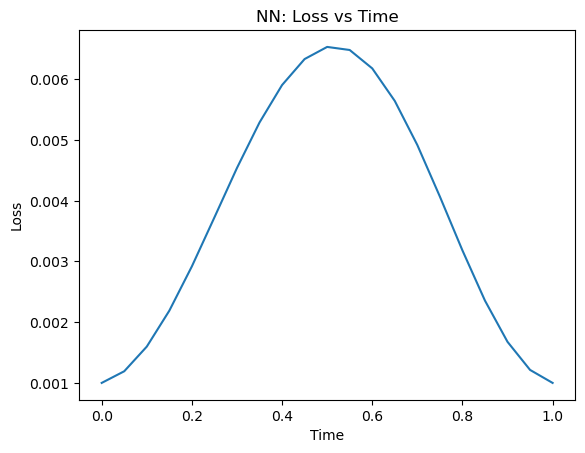

In [35]:
# Initialize Explorer
test = WSpaceExplorer()

# Set inputs and desired output and scale
inputs = np.array(([3,5],[5,1],[10,1]),dtype=float)
y = np.array(([75],[80],[93]),dtype=float)
inputs = inputs/np.amax(inputs,axis=0)
y = y/100

# Explore multiple ranges to examine effect multiple minima have on loss vs time
tLoss1, t = test.explore(inputs,y,10)
tLoss2, t = test.explore(inputs,y,5)
tLoss3, t = test.explore(inputs,y,2)

# Plot results 1
plt.plot(t, tLoss1)
plt.title("NN: Loss vs Time")
plt.xlabel("Time") 
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

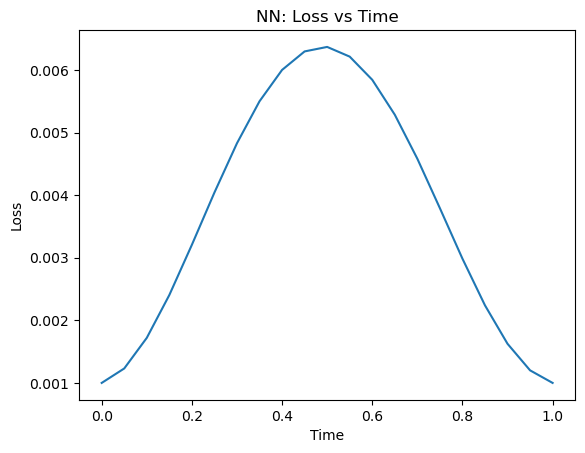

In [36]:
# Plot results 2
plt.plot(t, tLoss2)
plt.title("NN: Loss vs Time")
plt.xlabel("Time") 
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

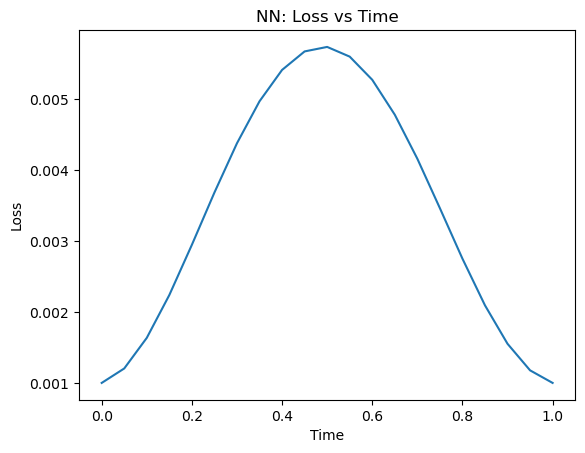

In [37]:
# Plot results 3
plt.plot(t, tLoss3)
plt.title("NN: Loss vs Time")
plt.xlabel("Time") 
plt.ylabel("Loss")

As you can see from the above plots, the number of minima/saddle points explored, parameterized, and interpolated has no noticeable effect on the shape of the loss vs time graph of the minimization of the network, even if all minima lie at vastly different points in W space. This implies that there are large thresholds in W space which would result in convergence, in turn also revealing why the ReLu activation function is much more efficient than the Sigmoid function for artificial neural networks. The ReLu activation function has a discrete derivative, allowing it to exploit said thresholds in W space to converge to minima/saddle points quicker than the Sigmoid's continuous counterpart. Again, examining the effect additional hidden layers would have on the loss vs time plot is a topic that should also be looked at, as it could reveal even more information about the W landscape.